<a href="https://colab.research.google.com/github/Plabiany/Text_Classification_DeepLearning/blob/main/Deep_Learning_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/text_classification/prova.csv', sep='|')
print(df.shape)
df.head()

(3177, 2)


,assunto,ementa
0,SERVIDOR PÚBLICO,\nPROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE...
1,SERVIDOR PÚBLICO,\nPROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO IN...
2,SERVIDOR PÚBLICO,\nPROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO IN...
3,SERVIDOR PÚBLICO,\nPROCESSUAL CIVIL E ADMINISTRATIVO. RECURSO E...
4,SERVIDOR PÚBLICO,\nPROCESSUAL CIVIL E ADMINISTRATIVO. EMBARGOS ...


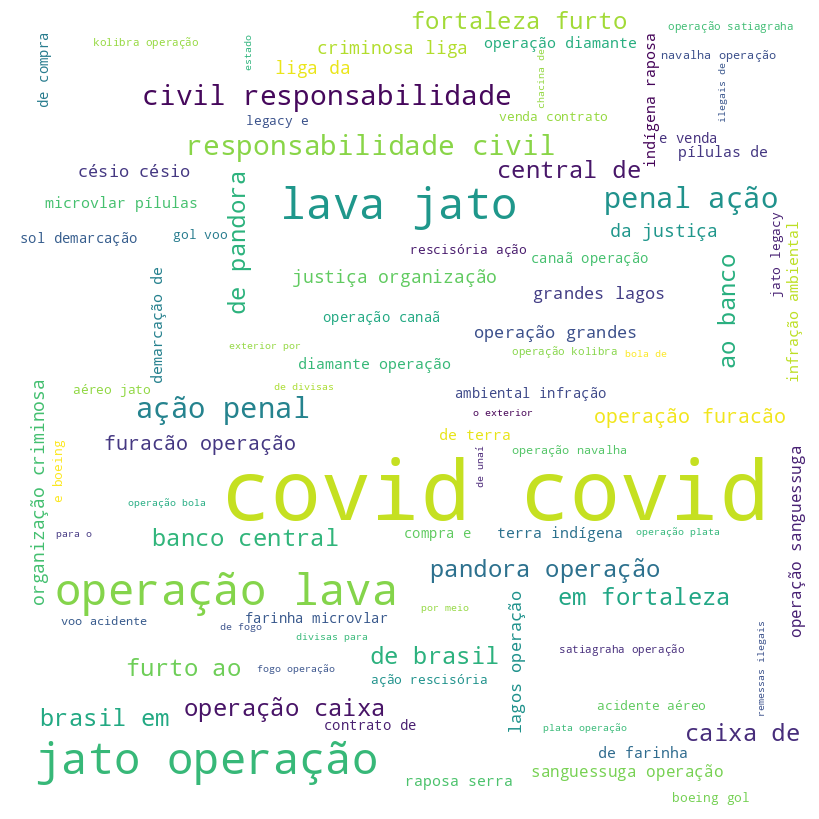

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.assunto:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-25 03:07:29.053249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 12.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
import re
import spacy
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
tqdm.pandas()

spacy_eng = spacy.load("pt_core_news_sm")
lemm = WordNetLemmatizer()


stop_words = stopwords.words('portuguese')
stop_words.remove('não')

def text_cleaning(x):

    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()

    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)

    return headline

def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

#df['assunto1'] = df['assunto'].progress_apply(get_entities)
df['ementa'] = df['ementa'].apply(text_cleaning)

print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


            assunto                                             ementa
0  SERVIDOR PÚBLICO  processual civil administrativo mandado segura...
1  SERVIDOR PÚBLICO  processual civil administrativo agravo interno...
2  SERVIDOR PÚBLICO  processual civil administrativo agravo interno...
3  SERVIDOR PÚBLICO  processual civil administrativo recurso especi...
4  SERVIDOR PÚBLICO  processual civil administrativo embargo diverg...


In [ ]:
X = df['ementa'].values
y = df['assunto'].factorize()[0]

y = pd.get_dummies(y)
#print(y)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y.values, test_size=0.33, random_state=0)

print('Training Data :', x_train.shape)
print('Testing Data : ', x_test.shape)

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)

#print(y_test)

#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)
#score = classifier.score(X_test, y_test)
#print("Accuracy:", score)

from keras.models import Sequential
from keras import layers
input_dim = X_train.shape[1]  # Number of features
print(input_dim)


model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(35, activation='softmax'))
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train,
                     epochs=50,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=32)

from keras.backend import clear_session
clear_session()
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Data : (2128,)
Testing Data :  (1049,)
34637
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3463800   
                                                                 
 dense_1 (Dense)             (None, 35)                3535      
                                                                 
Total params: 3467335 (13.23 MB)
Trainable params: 3467335 (13.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
67/67 [==============================] - 19s 205ms/step - loss: 0.9223 - accuracy: 0.8440 - val_loss: 0.5074 - val_accuracy: 0.8904
Epoch 2/50
67/67 [==============================] - 12s 180ms/step - loss: 0.2276 - accuracy: 0.9544 - val_loss: 0.4161 - val_accuracy: 0.9075
Epoch 3/50
67/67 [==============================] - 13s 189ms/step - los

33/33 [==============================] - 0s 2ms/step
[[7], [7], [7], [7], [6], [7], [7], [7], [7], [7], [7], [7], [7], [7], [18], [7], [7], [7], [9], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [1], [9], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [2], [7], [7], [9], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [9], [7], [7], [7], [7], [32], [7], [7], [7], [7], [7], [3], [7], [7], [7], [7], [7], [10], [9], [7], [7], [7], [7], [7], [7], [7], [7], [7], [9], [7], [7], [7], [7], [9], [7], [7], [3], [7], [7], [7], [7], [23], [7], [7], [9], [7], [7], [7], [7], [7], [7], [9], [7], [7], [7], [7], [7], [7], [7], [18], [7], [7], [9], [33], [7], [7], [7], [7], [7], [7], [9], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [32], [7], [7], [7], [14], [7], [9], [7], [7], [7], [7], [6], [7], [7], [9], [6], [7], [7], [32], [7], [6], [14], [7], [7], [14], [7], [7], [7], [7], 

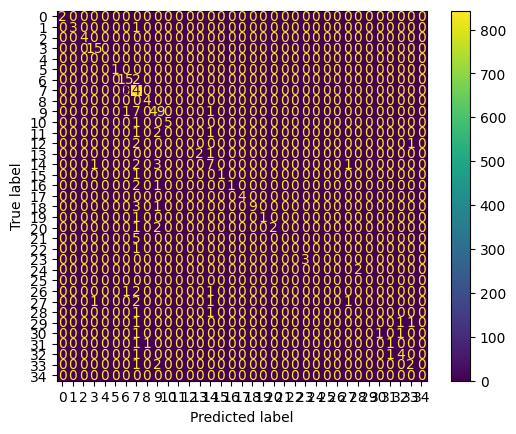

<Figure size 120400x120400 with 0 Axes>

In [ ]:
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
m = keras.metrics.MeanIoU(num_classes=35)
m.update_state(y_pred, y_test)

y_pred_norma = []
y_test_norma = []
for p in range(len(y_pred)):
  m = max(y_pred[p])
  y_pred_norma.append([i for i, j in enumerate(y_pred[p]) if j == m])

  m1 = max(y_test[p])
  y_test_norma.append([i for i, j in enumerate(y_test[p]) if j == m1])

print(y_pred_norma)
print(y_test_norma)

#print('acc',accuracy_score(y_test_norma, y_pred_norma))
#print('cohen_kappa_score', cohen_kappa_score(y_test_norma,y_pred_norma))

from sklearn.metrics import precision_score, recall_score, f1_score
print('precision',precision_score(y_test_norma,y_pred_norma, average='micro'))
print('recall',recall_score(y_test_norma,y_pred_norma, average='micro'))
print('f1',f1_score(y_test_norma,y_pred_norma, average='micro'))
#confusion_matrix(y_test_norma, y_pred_norma, labels=["0", "1", "2", '3','4'])

cm = confusion_matrix(y_test_norma, y_pred_norma, labels=range(35))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=range(35))
disp.plot()
plt.figure(figsize=(1204,1204))
plt.show()
